<h1>Project Objective</h1>
Develop a predictive model to estimate health insurance claim amounts using machine learning techniques, leveraging patient and provider data to understand claim amount variations.

Importing comprehensive library for data workflow
Including data manipulation, statistical analysis, machine learning, and visualization tools and ensuring all necessary modules are available for end-to-end data science process.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

<h1>Visualization Setup</h1>


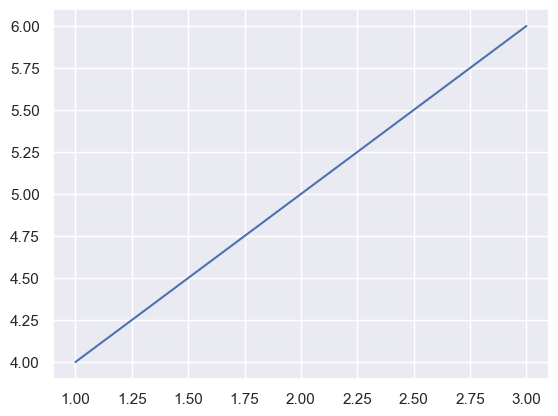

In [ ]:
# Set style for better visualizations
# Use seaborn's set_theme function instead of plt.style.use
sns.set_theme(style="darkgrid")
# Continue using Matplotlib for plotting
plt.plot([1, 2, 3], [4, 5, 6])
plt.show()

<h1>Data Loading</h1>

In [ ]:
# Import dataset
dataset_path = 'enhanced_health_insurance_claims.csv'
df = pd.read_csv(dataset_path)

<h1>Initial Data Exploration</h1>

In [7]:
# Data Analysis and Visualization Section
print("Dataset Information:")
print(f"Number of records: {len(df)}")
print(f"Number of features: {len(df.columns)}")
print("\nFeature Types:")
print(df.dtypes)

Dataset Information:
Number of records: 4500
Number of features: 17

Feature Types:
ClaimID                     object
PatientID                   object
ProviderID                  object
ClaimAmount                float64
ClaimDate                   object
DiagnosisCode               object
ProcedureCode               object
PatientAge                   int64
PatientGender               object
ProviderSpecialty           object
ClaimStatus                 object
PatientIncome              float64
PatientMaritalStatus        object
PatientEmploymentStatus     object
ProviderLocation            object
ClaimType                   object
ClaimSubmissionMethod       object
dtype: object


<h1>Correlation Analysis and Comprehensive Data Visualization</h1>

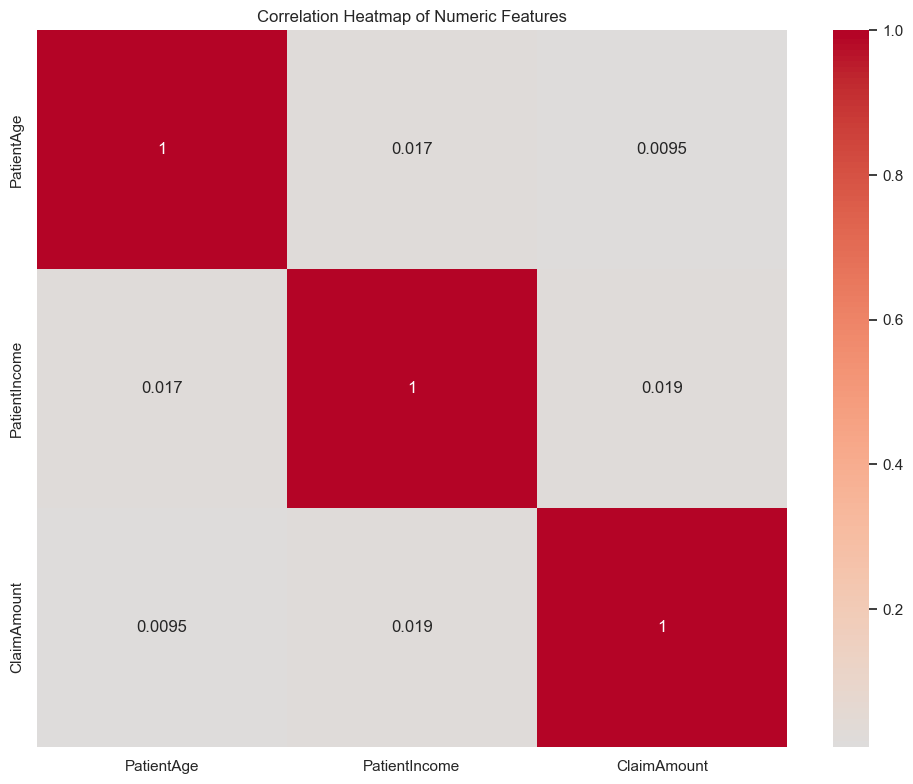

In [ ]:
# Correlation Analysis for Numeric Features
numeric_cols = ['PatientAge', 'PatientIncome', 'ClaimAmount']
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

<h1>Data Preprocessing for Modeling</h1>

C:\Users\HP\AppData\Local\Temp\ipykernel_95132\3668814898.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=45)


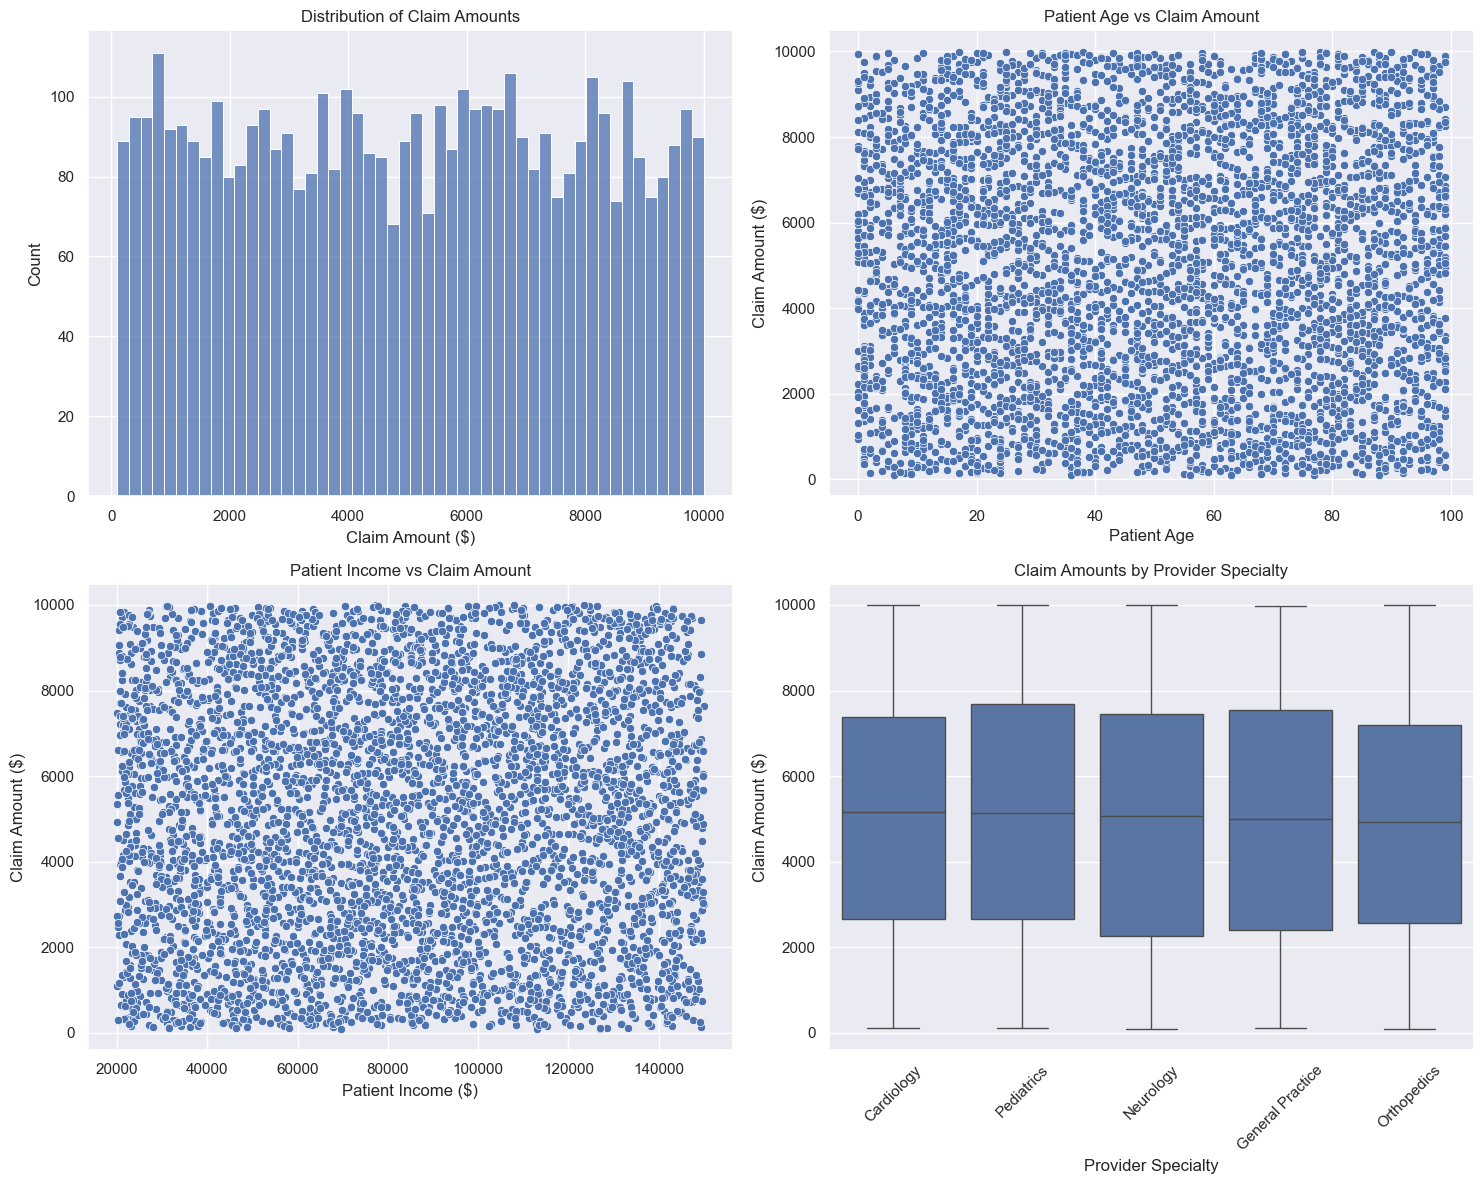

In [ ]:
# Distribution Analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Claim Amount Distribution
sns.histplot(data=df, x='ClaimAmount', bins=50, ax=axes[0,0])
axes[0,0].set_title('Distribution of Claim Amounts')
axes[0,0].set_xlabel('Claim Amount ($)')

# Patient Age vs Claim Amount
sns.scatterplot(data=df, x='PatientAge', y='ClaimAmount', ax=axes[0,1])
axes[0,1].set_title('Patient Age vs Claim Amount')
axes[0,1].set_xlabel('Patient Age')
axes[0,1].set_ylabel('Claim Amount ($)')

# Patient Income vs Claim Amount
sns.scatterplot(data=df, x='PatientIncome', y='ClaimAmount', ax=axes[1,0])
axes[1,0].set_title('Patient Income vs Claim Amount')
axes[1,0].set_xlabel('Patient Income ($)')
axes[1,0].set_ylabel('Claim Amount ($)')

# Claim Amount by Provider Specialty
sns.boxplot(data=df, x='ProviderSpecialty', y='ClaimAmount', ax=axes[1,1])
axes[1,1].set_title('Claim Amounts by Provider Specialty')
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=45)
axes[1,1].set_xlabel('Provider Specialty')
axes[1,1].set_ylabel('Claim Amount ($)')

plt.tight_layout()
plt.show()

In [ ]:
# Im removing the ID columns and ClaimDate as they won't be useful for prediction
features_to_drop = ['ClaimID', 'PatientID', 'ProviderID', 'ClaimDate']
df_model = df.drop(features_to_drop, axis=1)

In [11]:
# Separate features and target
X = df_model.drop('ClaimAmount', axis=1)
y = df_model['ClaimAmount']

<h1>Train-Test Split</h1>

In [12]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h1>Feature Type Definition</h1>

In [13]:
# Define numeric and categorical columns
numeric_features = ['PatientAge', 'PatientIncome']
categorical_features = ['PatientGender', 'ProviderSpecialty', 'ClaimStatus',
                       'PatientMaritalStatus', 'PatientEmploymentStatus',
                       'ProviderLocation', 'ClaimType', 'ClaimSubmissionMethod',
                       'DiagnosisCode', 'ProcedureCode']

<h1>Preprocessing Pipelines</h1>

In [14]:
# Create preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
])

In [15]:
 # Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

<h1>Model Definition</h1>

In [16]:
# Define the models dictionary
models = {
    'Linear Regression': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ]),
    'Decision Tree': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', DecisionTreeRegressor(random_state=42))
    ]),
    'Random Forest': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
    ])
}

# Quick check to make sure models is defined
print("Available models:", list(models.keys()))

Available models: ['Linear Regression', 'Decision Tree', 'Random Forest']


<h1>Model Training and Evaluation</h1>

In [17]:
# Train and evaluate models
results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        'RMSE': rmse,
        'R2': r2,
        'Model': model,
        'Predictions': y_pred  # Store the predictions
    }
    print(f"{name} Results:")
    print(f"RMSE: ${rmse:.2f}")
    print(f"R2 Score: {r2:.4f}")


Training Linear Regression...


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [5, 8, 9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Linear Regression Results:
RMSE: $2881.23
R2 Score: -0.0343

Training Decision Tree...


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [5, 8, 9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Decision Tree Results:
RMSE: $3954.89
R2 Score: -0.9487

Training Random Forest...


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [5, 8, 9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Random Forest Results:
RMSE: $2945.28
R2 Score: -0.0808


<h1>Model Selection</h1>

In [18]:
# Find the best model based on RMSE
best_model_name = min(results, key=lambda x: results[x]['RMSE'])
best_model = results[best_model_name]['Model']

print(f"\nBest performing model: {best_model_name}")


Best performing model: Linear Regression


<h1>Linear Regression Visualization</h1>

In [19]:
# Visualize Linear Regression Results
# Get predictions from linear regression model
linear_predictions = results['Linear Regression']['Predictions']

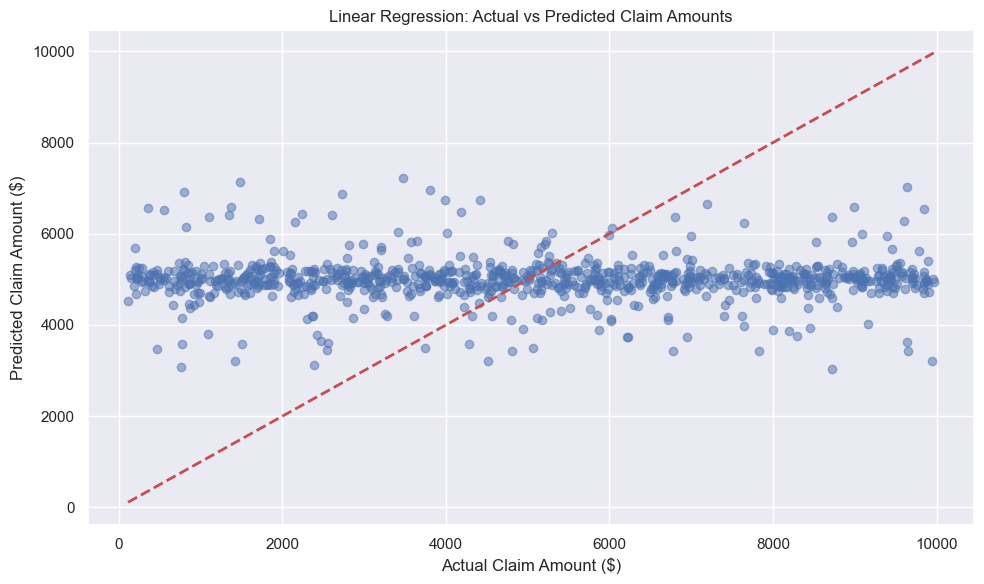

In [20]:
# Create scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, linear_predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Claim Amount ($)')
plt.ylabel('Predicted Claim Amount ($)')
plt.title('Linear Regression: Actual vs Predicted Claim Amounts')
plt.tight_layout()
plt.show()

In [21]:
# Save the best model
joblib.dump(best_model, 'best_insurance_claim_model.joblib')

['best_insurance_claim_model.joblib']

In [22]:
# Make prediction on one test data point
sample_test_data = X_test.iloc[0:1]
sample_actual = y_test.iloc[0]
sample_prediction = best_model.predict(sample_test_data)[0]

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [5, 8, 9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


<h1>Sample Prediction Demonstration</h1>

In [23]:
print("\nSample Prediction on Test Data:")
print(f"Actual Claim Amount: ${sample_actual:.2f}")
print(f"Predicted Claim Amount: ${sample_prediction:.2f}")
print(f"Prediction Error: ${abs(sample_actual - sample_prediction):.2f}")


Sample Prediction on Test Data:
Actual Claim Amount: $3162.79
Predicted Claim Amount: $5108.97
Prediction Error: $1946.18
